In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/2shakilrafi/wednesday_lecture/main/adult.csv",engine = "pyarrow")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
X = df[["age","education","race","gender","native-country", "marital-status"]]
y = np.where(df["income"] == ">50K",1,0)

In [ ]:
X_encoded = pd.get_dummies(X, columns=["education","race","gender","native-country","marital-status"])

In [ ]:
X_encoded

,age,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,...,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,38,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,28,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,18,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
48838,40,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
48839,58,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
48840,22,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

lr_prediction = lr_model.predict(X_test)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(lr_prediction,y_test)

0.8175415608877242

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

rf_prediction = rf_model.predict(X_test)

In [ ]:
rf_feature_importances = rf_model.feature_importances_

In [ ]:
import matplotlib.pyplot as plt

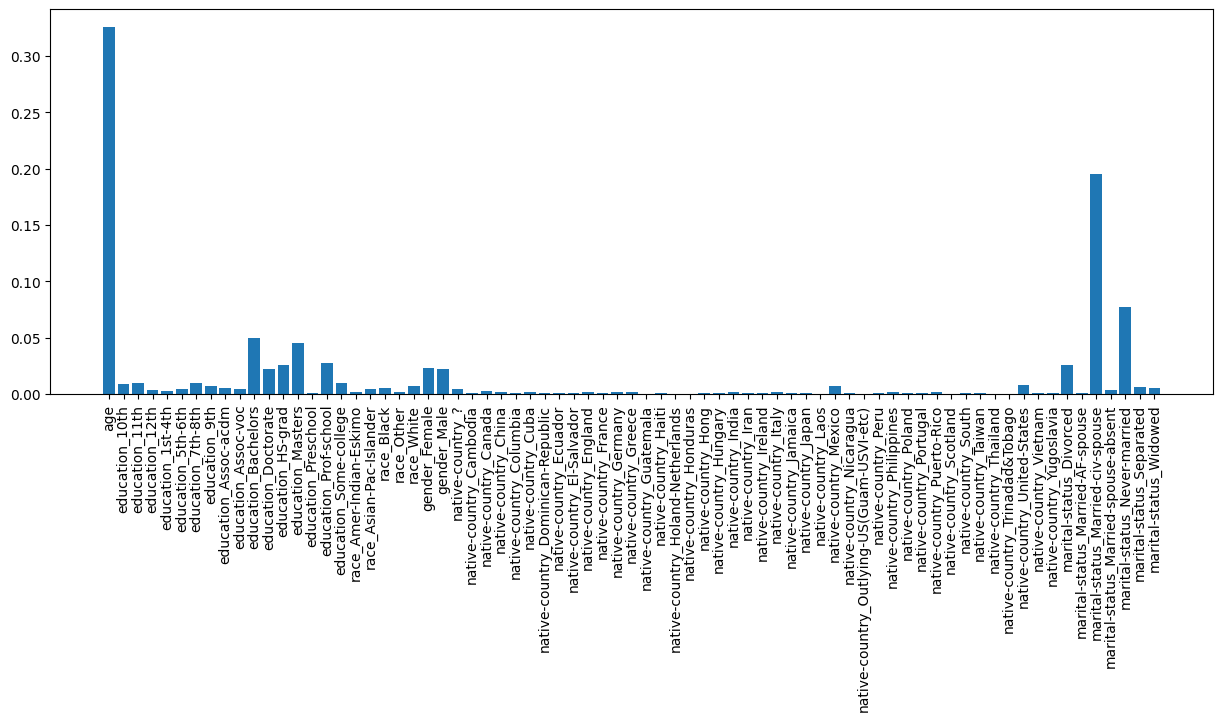

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(X_encoded.columns,rf_feature_importances)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

mlp_predict = mlp_model.predict(X_test)

In [ ]:
accuracy_score(mlp_predict, y_test)

0.8269592989927115

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_predict = xgb_model.predict(X_test)

In [ ]:
accuracy_score(xgb_predict,y_test)

0.8258127917451478

In [ ]:
!pip install pytorch_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
tnc_model = TabNetClassifier()

Device used : cuda


In [ ]:
tnc_model.fit(X_train.values, y_train, max_epochs = 10)

No early stopping will be performed, last training weights will be used.


epoch 0  | loss: 0.50769 |  0:00:06s
epoch 1  | loss: 0.43213 |  0:00:09s
epoch 2  | loss: 0.40902 |  0:00:12s
epoch 3  | loss: 0.40406 |  0:00:16s
epoch 4  | loss: 0.39439 |  0:00:19s
epoch 5  | loss: 0.38764 |  0:00:20s
epoch 6  | loss: 0.38437 |  0:00:22s
epoch 7  | loss: 0.3801  |  0:00:23s
epoch 8  | loss: 0.38121 |  0:00:24s
epoch 9  | loss: 0.37859 |  0:00:25s


In [ ]:
tnc_prediction = tnc_model.predict(X_test.values)

In [ ]:
accuracy_score(tnc_prediction, y_test)

0.8184423880108099

In [ ]:
!pip install shap

In [ ]:
import shap

lr_explainer = shap.Explainer(lr_model.predict, X_test)

In [ ]:
lr_shap_values = lr_explainer(X_test)

Permutation explainer: 12212it [06:56, 29.20it/s]                           


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


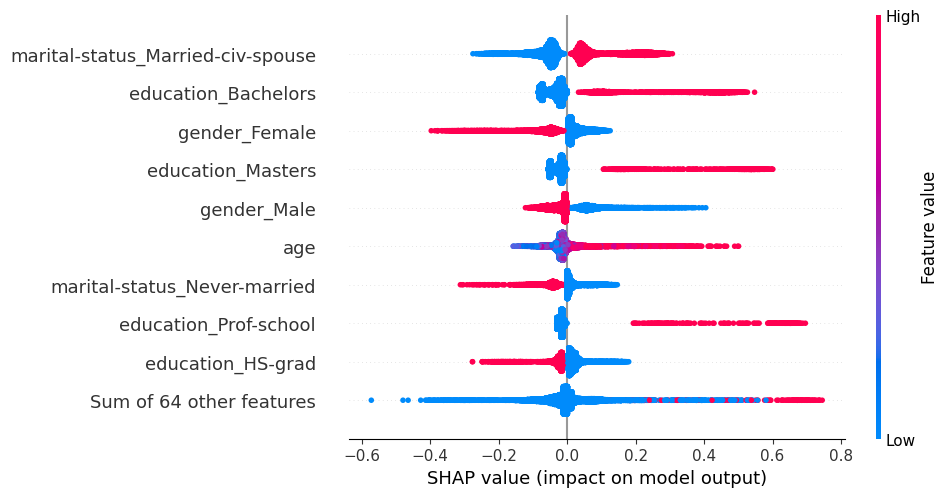

In [ ]:
 shap.plots.beeswarm(lr_shap_values)

In [ ]:
shap.plots.bar(lr_shap_values)

NameError: ignored